In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df.dropna(subset=['dropoff_longitude','dropoff_latitude'], inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x15f914eb290>,
 'caps': [<matplotlib.lines.Line2D at 0x15f9155c710>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f9152d610>],
 'medians': [<matplotlib.lines.Line2D at 0x15f9155d910>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f9155e010>],
 'means': []}

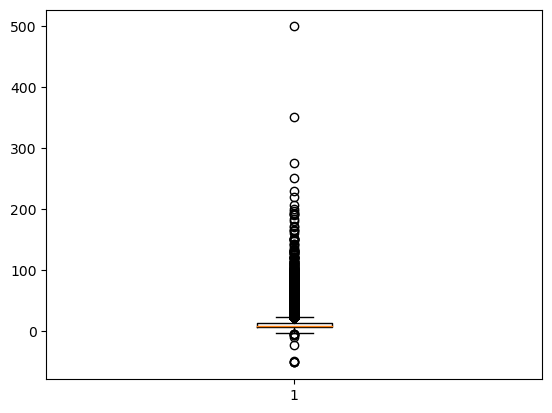

In [14]:
plt.boxplot(x=df['fare_amount'])

In [1]:
numeric_columns = df.select_dtypes(exclude=['object'])
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True)

NameError: name 'df' is not defined

In [19]:
x = df.drop(['key','pickup_datetime'],axis = 1)

In [20]:
y = df['fare_amount']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [27]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [51]:
rd = Ridge(alpha=1.0)
rd.fit(x_train, y_train)

Ridge()

In [52]:
ls = Lasso(alpha=1.0)
ls.fit(x_train, y_train)

Lasso()

In [58]:
import numpy as np

In [55]:
lr_pred = lr.predict(x_test)
rd_pred = rd.predict(x_test)
ls_pred = ls.predict(x_test)

In [57]:
lr_score = r2_score(y_test,lr_pred)
rd_score = r2_score(y_test,rd_pred)
ls_score = r2_score(y_test,ls_pred)

In [60]:
lr_rmse = np.sqrt(mean_squared_error(y_test,lr_pred))
rd_rmse = np.sqrt(mean_squared_error(y_test,rd_pred))
ls_rmse = np.sqrt(mean_squared_error(y_test,ls_pred))

In [62]:
print("Linear Regression R-squared:", lr_pred)
print("Ridge Regression R-squared:", rd_r2)
print("Lasso Regression R-squared:", ls_r2)

print("Linear Regression RMSE:", lr_rmse)
print("Ridge Regression RMSE:", ridge_rmse)
print("Lasso Regression RMSE:", lasso_rmse)


[ 6.5  4.1 12.  ...  4.5  6.1  7.5]


array([ 6.99648507,  4.84144361, 11.93512176, ...,  5.20061719,
        6.6373115 ,  7.89441902])